## Altair

<a href="https://altair-viz.github.io/gallery/index.html"><img src="https://altair-viz.github.io/_static/altair-logo-light.png" width="170" /></a>

"One of the unique features of Altair, inherited from Vega-Lite, is a declarative grammar of not just visualization, but interaction. "

\- Jake Vanderplas

## But first, let's learn about compound charts
- layering
- concatenating



In [1]:
import pandas as pd
from altair import *
import altair as alt
from vega_datasets import data
alt.__version__

'3.0.1'

In [2]:
## run this code but don't worry about what it does
import altair as alt

def workshop_theme(*args, **kwargs):
    return {
            "width": 500,
            "height": 300,
            "config": {
              "title": {
                  'fontSize': 20
              },
              "numberFormat": ".0f",
              "style": {
                "bar": {
                  "size": 5
                },
                "guide-title": {
                  "fontSize": 25
                },
                "guide-label": {
                  "fontSize": 20
                },
              },
              "scale": {
                "bandPaddingInner": 0.5,
                "bandPaddingOuter": 0.5
              },
              "legend": {
                "symbolSize": 100,
                "titleFontSize": 20,
                "labelFontSize": 18
              },
              "axis": {
                "titleFontSize": 20,
                "labelFontSize": 18
              }
            }
          }
          

themes.register('workshop_theme', workshop_theme)
themes.enable('workshop_theme');
#themes.enable('default')

## Layering
- put one chart on top of another
- e.g., a line over bars, text labels on top of bars, etc...

## Altair gives you *composable* elements
- So, to layer two charts:

```python
chart1 + chart2
```
Or, 

```python
Layer(chart1,chart2)

```

In [3]:
stocks = data.stocks()
google = stocks.query("symbol=='GOOG'")
others = stocks.query("symbol!='GOOG'")
stocks.head()

symbol       date  price
0   MSFT 2000-01-01  39.81
1   MSFT 2000-02-01  36.35
2   MSFT 2000-03-01  43.22
3   MSFT 2000-04-01  28.37
4   MSFT 2000-05-01  25.45

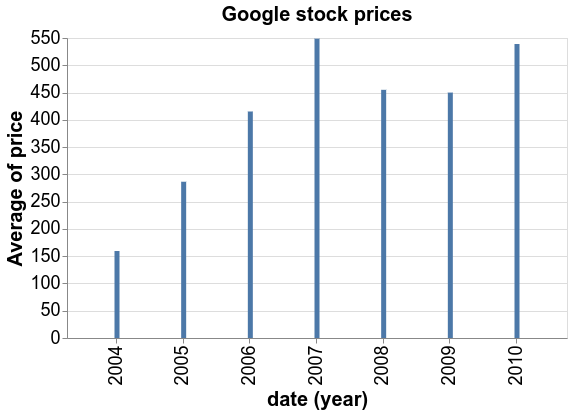

In [4]:
bars=Chart(google).mark_bar().encode(
    x='year(date):N',
    y='average(price)',
    
).properties(title='Google stock prices')

bars

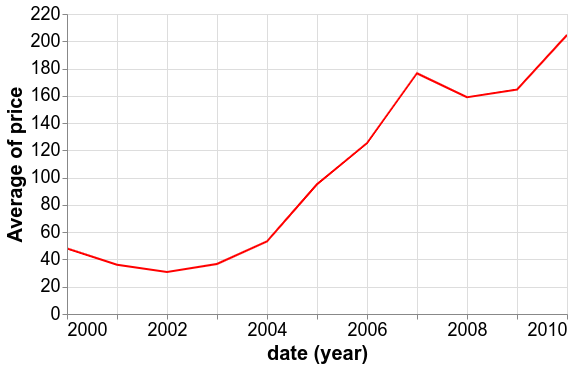

In [5]:
line=Chart(stocks).mark_line(color='red', clip=True).encode(
    x=X('year(date)'),
    y='average(price)',
)

line

### adding some kind of benchmark

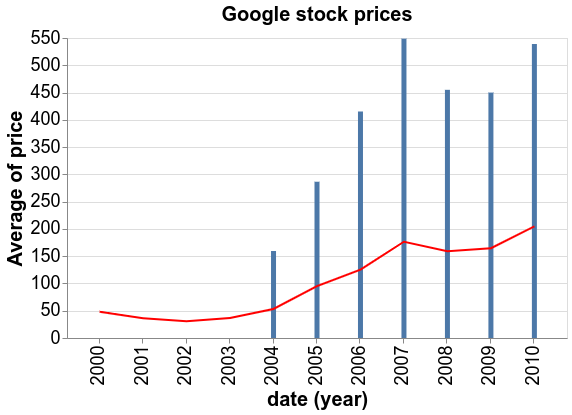

In [6]:
bars + line

### adding some kind of benchmark

In [7]:
google.head()

symbol       date   price
369   GOOG 2004-08-01  102.37
370   GOOG 2004-09-01  129.60
371   GOOG 2004-10-01  190.64
372   GOOG 2004-11-01  181.98
373   GOOG 2004-12-01  192.79

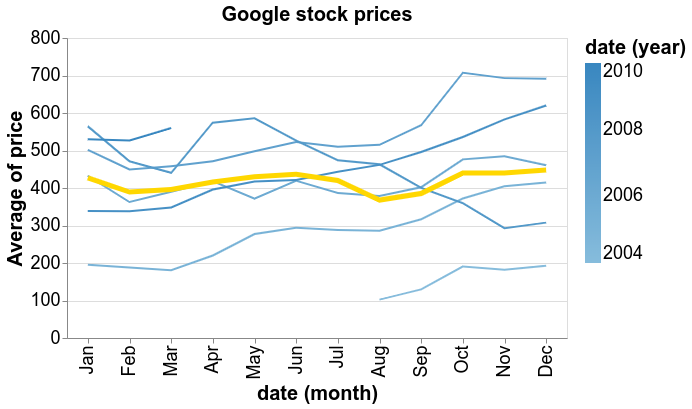

In [8]:
all_lines = Chart(google).mark_line().encode(
    x='month(date):N',
    y='average(price):Q',
    color='year(date)'
).properties(title='Google stock prices')

avg_line = Chart(google).mark_line(color='gold', strokeWidth=5).encode(
    x='month(date):N',
    y='average(price):Q')

all_lines + avg_line

### Adding text labels

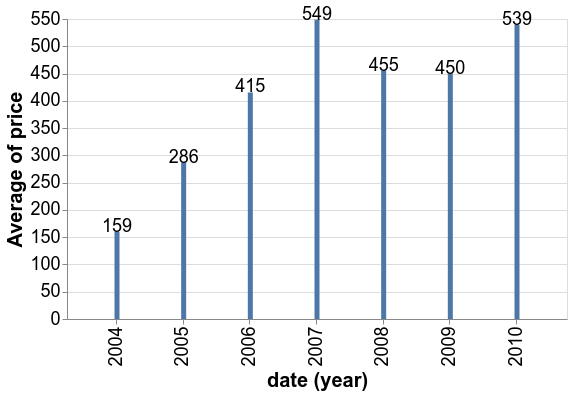

In [9]:
bars = Chart(google).mark_bar().encode(
  y='average(price)',
  x='year(date):N'
)

text = Chart(google).mark_text(size=18).encode(
  y='average(price)',
  x='year(date):N',
  text='average(price)',
)

bars + text

## Concatenating 
- similar to layering except that you want to put one chart beside another (or underneath)

```python
chart1 | chart2

```
Or,

```python
hconcat(chart1,chart2)

```

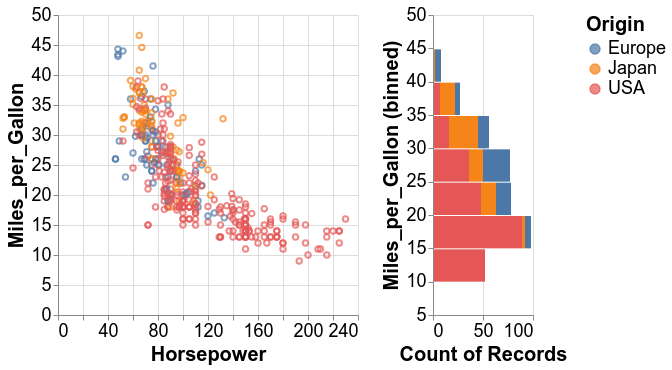

In [10]:
cars=data.cars()

chart1 = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
).properties(
    height=300,
    width=300
)

chart2 = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y=alt.Y('Miles_per_Gallon:Q', bin=alt.Bin(maxbins=10)),
    color='Origin:N'
).properties(
    height=300,
    width=100
)

chart1 | chart2

## Basic Interaction

- sometimes basic is all that is needed
- tooltips
- panning and zooming

### tooltips

- this is considered an encoding (like position, color, shape, opacitiy, etc)
- notice that it is, naturally, specified in the "encode" method
- again, we are mapping values  in our data to tooltips that pop up when we hover over marks
- great for dense charts or as a technique to hide information that would otherwise make for a cluttered chart

In [11]:
df = pd.DataFrame({'flavours': ['chocolate', 'vanilla', 'strawberry', 'tigerstripe', 'butterscotch', 'bubblegum'],
                     'rating': [9, 3, 6, 4, 7, 1]})

df.head()

flavours  rating
0     chocolate       9
1       vanilla       3
2    strawberry       6
3   tigerstripe       4
4  butterscotch       7

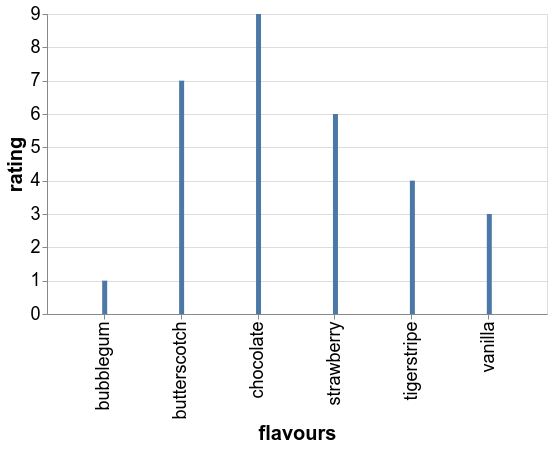

In [12]:
Chart(df).mark_bar().encode(
    y='rating',
    x='flavours',
    tooltip=['rating', 'flavours']
)

In [13]:
weather=data.seattle_weather()
weather.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

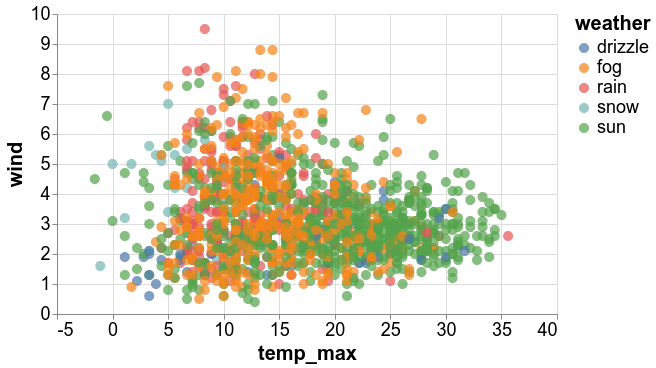

In [14]:
Chart(weather).mark_circle(size=100).encode(
    y='wind',
    x='temp_max',
    color='weather',
    tooltip=['wind', 'temp_max', 'weather']
)

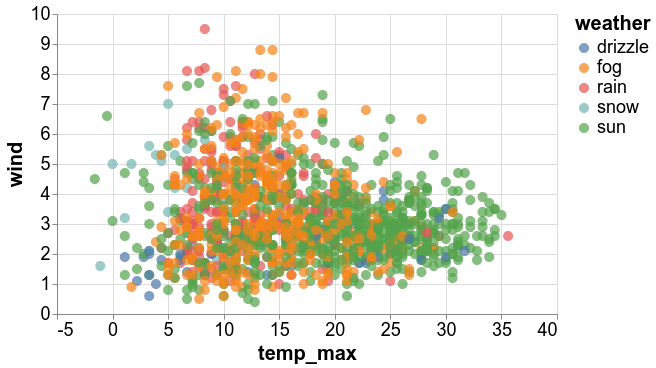

In [15]:
Chart(weather).mark_circle(size=100).encode(
    y='wind',
    x='temp_max',
    color='weather',
    tooltip=['precipitation', 'date:N']
)

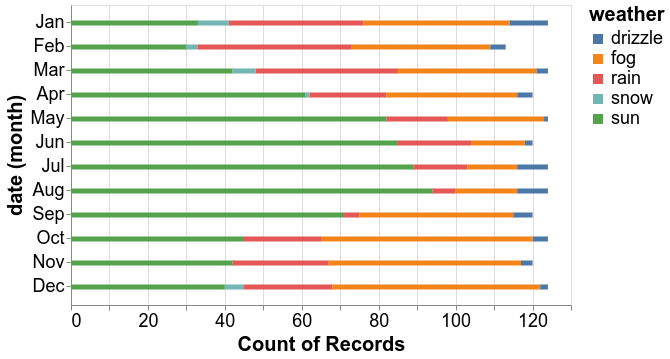

In [16]:
Chart(weather).mark_bar().encode(
    y='month(date):N',
    x='count()',
    color='weather',
    tooltip=['count()', 'average(precipitation)', 'variance(precipitation)']
)

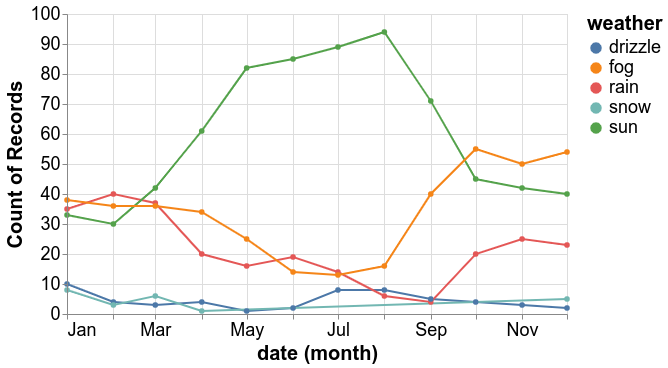

In [17]:
Chart(weather).mark_line(point=True).encode(
    y='count()',
    x='month(date)',
    color='weather',
    tooltip=['average(wind)', 'average(precipitation)', 'max(temp_max)']
)

#### your turn to practice making some charts using tooltips!

- we will use the cars dataset 

In [18]:
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

### .interactive

- yes, I put a dot there...
- one easy way to get interactivity is to use the "interactive()" method
 - enables panning and zooming
- simply add it to the end of your code
- we will do more complext interactions later

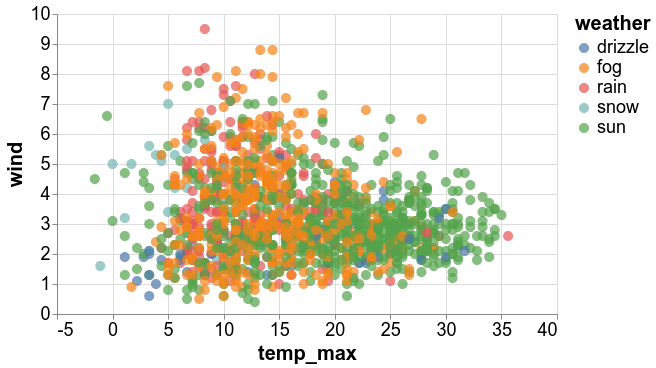

In [19]:
Chart(weather).mark_circle(size=100).encode(
    y='wind',
    x='temp_max',
    color='weather',
    tooltip=['precipitation', 'date']
).interactive()

#### practice making any chart and add the "interactive()" method to the end of the code

 - note that panning and zooming do not work on nominal axes (yet)

## Interactions with "selections"

- selections are the building blocks of interaction
- just like make types (mark_bar, mark_line) there are selection types
- selections come in three types
 - selection_single
 - selection_multi
 - selection_interval
 
- selections are used together with conditions 
 


## selection_interval

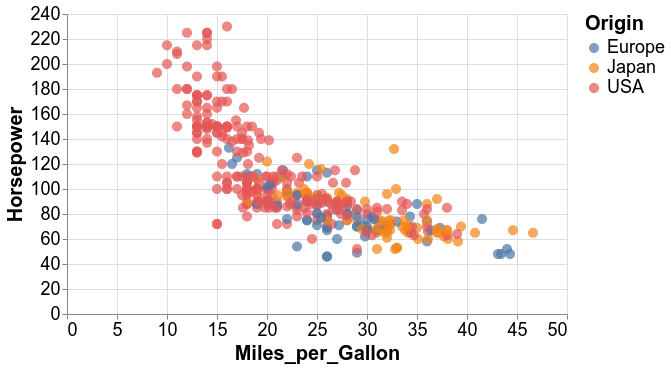

In [20]:
interval = selection_interval()

Chart(cars).mark_point(filled=True, size=100).encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N',
    
).add_selection(
    interval
)

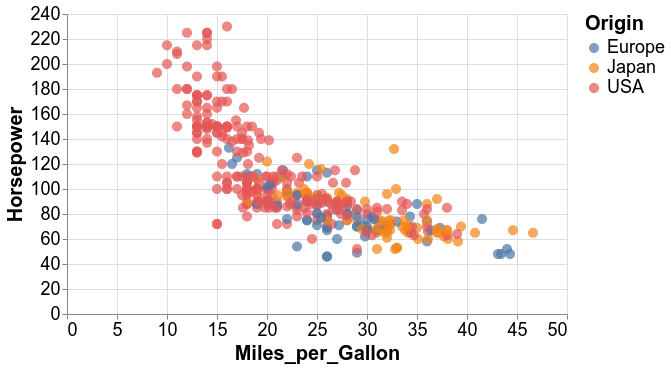

In [21]:
interval = selection_interval()
my_condition = condition(interval, 'Origin:N', value('lightgray'))

Chart(cars).mark_point(filled=True, size=100).encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color=my_condition
    
).add_selection(
    interval
)

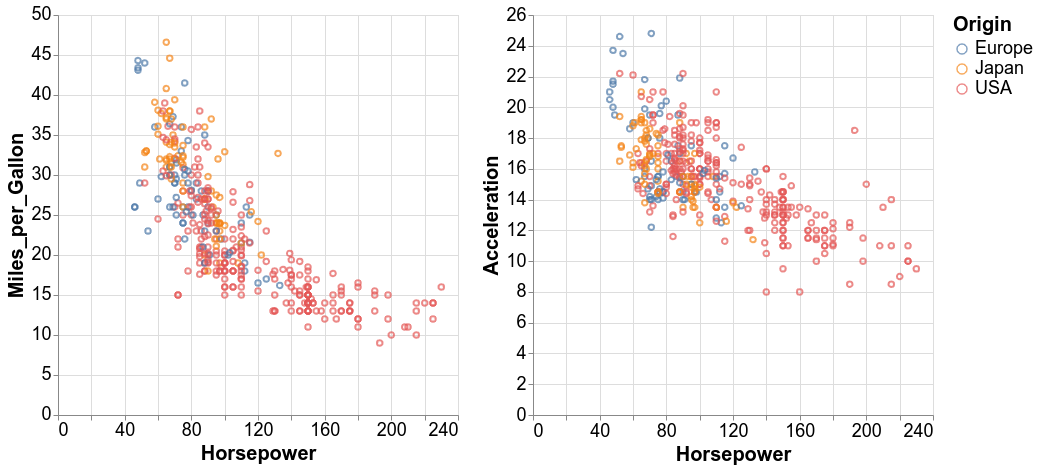

In [22]:
interval = selection_interval()
my_condition = condition(interval, 'Origin:N', value('lightgray'))

chart1 = Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=my_condition
).add_selection(
    interval
).properties(
    width=400,
    height=400
)

chart2 = Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Acceleration:Q',
    color=my_condition
).add_selection(
    interval
).properties(
    width=400,
    height=400
)

chart1 | chart2



## selection_single

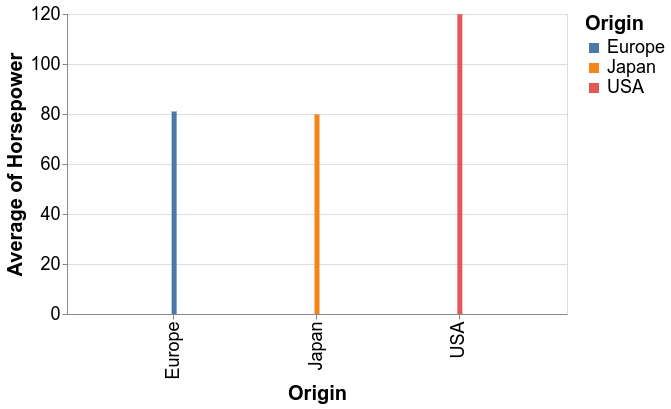

In [23]:
single = selection_single()

my_condition = condition(single,'Origin:N', value('lightgray'))

Chart(cars).mark_bar(filled=True).encode(
    x='Origin:N',
    y='average(Horsepower):Q',
    color=my_condition,
    
).add_selection(
    single
)

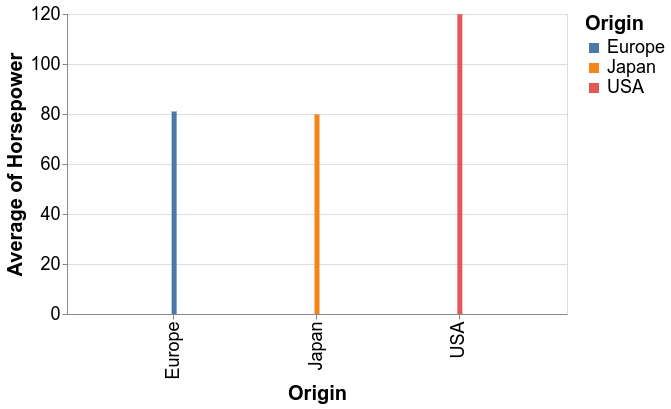

In [24]:
single = selection_single(on='mouseover', nearest=True)

my_condition = condition(single,'Origin:N', value('lightgray'))

Chart(cars).mark_bar(filled=True).encode(
    x='Origin:N',
    y='average(Horsepower):Q',
    color=my_condition,
    
).add_selection(
    single
)

## selection_multi

In [25]:
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

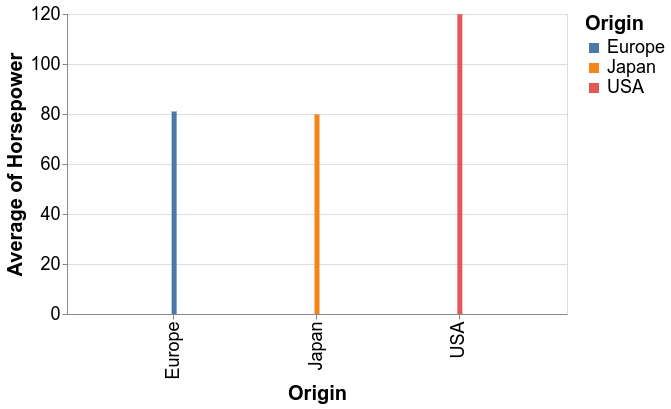

In [26]:
multi = selection_multi()

my_condition = condition(multi,'Origin:N', value('lightgray'))

Chart(cars).mark_bar(filled=True).encode(
    x='Origin:N',
    y='average(Horsepower):Q',
    color=my_condition,
    
).add_selection(
    multi
)


## Using selections to control more than one chart
- we saw an exampe of this already, but look there's more...


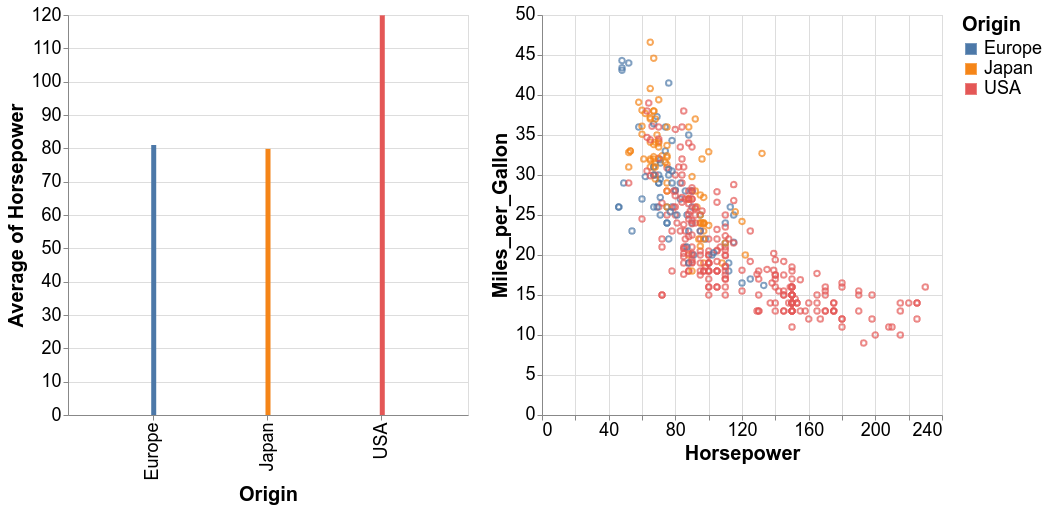

In [27]:
multi = selection_multi(encodings=['color'])
my_condition = condition(multi, 'Origin:N', value('lightgray'))

chart1 = Chart(cars).mark_bar().encode(
    x='Origin:N',
    y='average(Horsepower):Q',
    color=my_condition,
).add_selection(
    multi
).properties(
    width=400,
    height=400
)

chart2 = Chart(cars).mark_point().encode(
    y='Miles_per_Gallon:Q',
    x='Horsepower:Q',
    tooltip='Name:N',
    color=my_condition
).properties(
    width=400,
    height=400
)

chart1 | chart2

## Using selections with filters
- here we learn a new command called "transform_filter"
- it does what it sounds like:
 - transforms the data by filtering out values
 
- the thing is that now we can use selections to control what data are filtered

### This is perhaps not that useful...

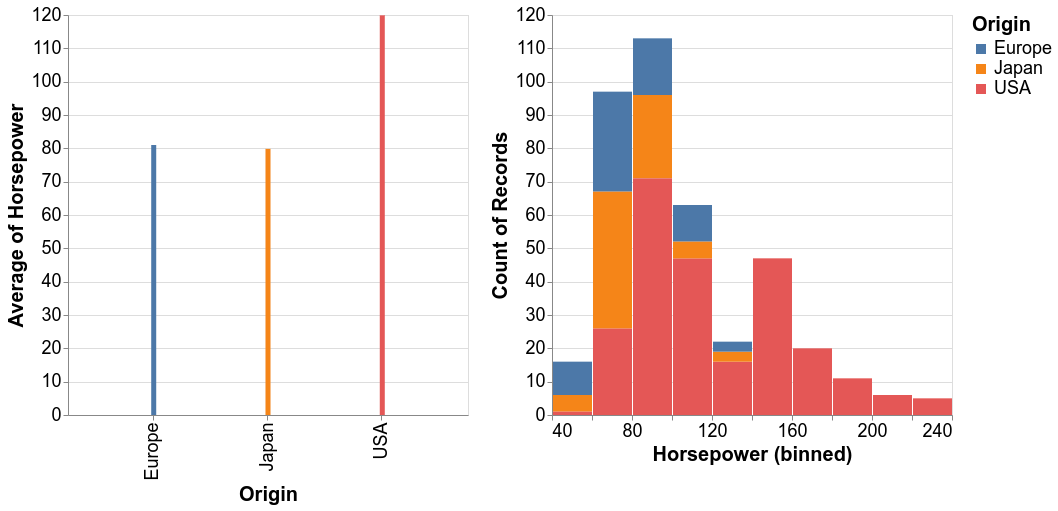

In [28]:
multi = selection_multi(encodings=['color'])
my_condition = condition(multi, 'Origin:N', value('lightgray'))

chart1 = Chart(cars).mark_bar().encode(
    x='Origin:N',
    y='average(Horsepower):Q',
    color=my_condition,
).add_selection(
    multi
).properties(
    width=400,
    height=400
)

chart2 = Chart(cars).mark_bar().encode(
    y='count()',
    x=X('Horsepower:Q', bin=True),
    color=my_condition
).properties(
    width=400,
    height=400
)

chart1 | chart2

### but we can add a filter so that we can control exactly which data gets passed to the histogram

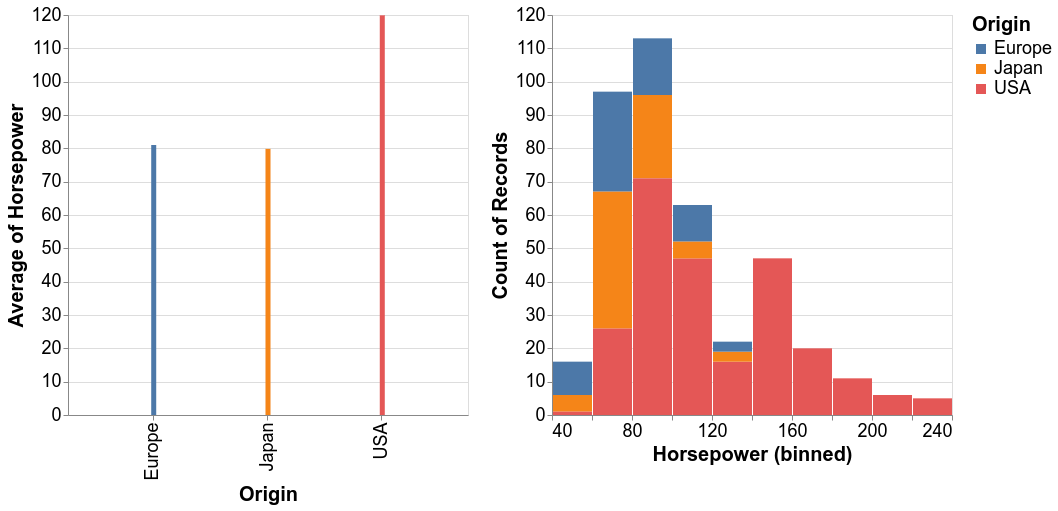

In [29]:
multi = selection_multi(encodings=['color'])
my_condition = condition(multi, 'Origin', value('lightgray'))

chart1 = Chart(cars).mark_bar().encode(
    x='Origin:N',
    y='average(Horsepower):Q',
    color=my_condition,
).properties(
width=400,
height=400,
selection = multi
)

chart2 = Chart(cars).mark_bar().encode(
    y='count()',
    x=X('Horsepower:Q', bin=True),
    color='Origin'
).properties(
width=400,
height=400
).transform_filter(
    multi
)

chart1 | chart2

## Just for fun...

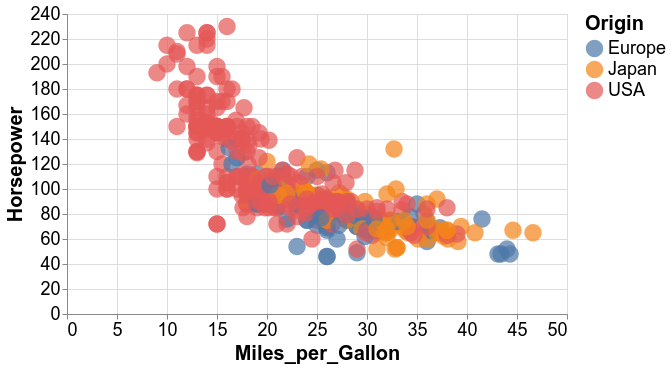

In [30]:
interval = selection_interval()
my_condition = condition(interval, Size('Origin:N', scale=Scale(range=[300,300])), value(20))

Chart(cars).mark_point(filled=True).encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N',
    size=my_condition,
    
).add_selection(
    interval
)

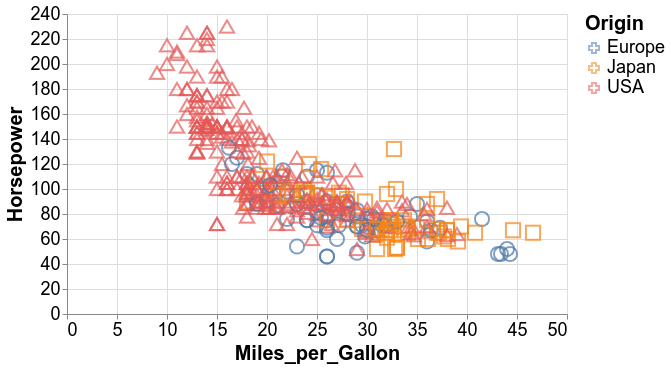

In [31]:
interval = selection_interval()
my_condition = condition(interval, 'Origin:N', value('cross'))


Chart(cars).mark_point(size=200).encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N',
    shape=my_condition,

).add_selection(
    interval
)

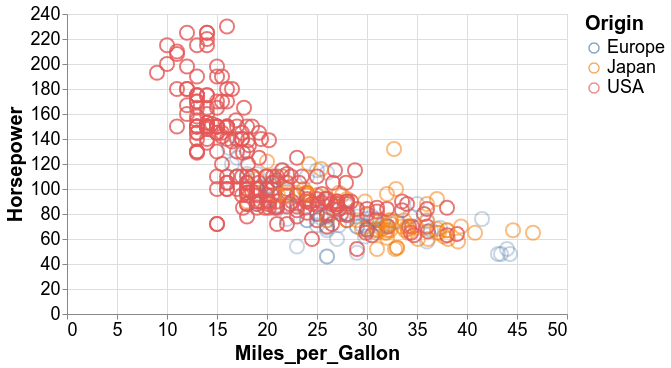

In [32]:
interval = selection_interval()
my_condition = condition(interval, 'Origin:N', value(0))

Chart(cars).mark_point(size=200).encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N',
    opacity=my_condition,
    
).add_selection(
    interval
)

## Some useful customizations
- customizations usually requires Altair's the long form syntax (but don't worry, it's not that much more code)
- you will find below a number of examples where various customizaions have been added
- this is to serve as a basic reference without explanation

---
In no particular order you will find examples for customizing:

- title
- axis titles
- scales
- colors
- legends

Also note that there is a custom theme used at the top of the notebook which sets default settings in once place (e.g., fontsizes, chart width and height)

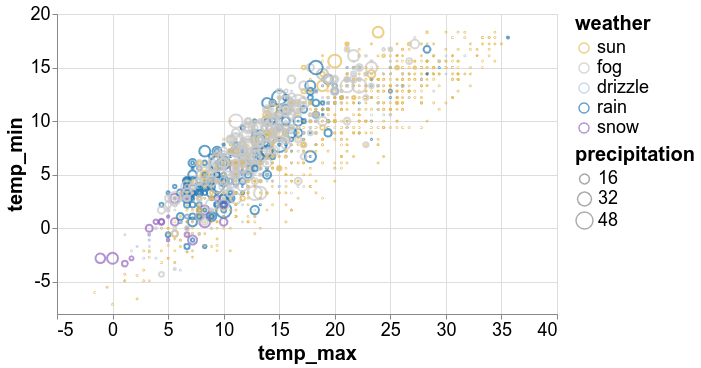

In [33]:
Chart(weather).mark_point().encode(
    x='temp_max',
    y='temp_min',
    tooltip=['date', 'temp_max', 'temp_min', 'precipitation', 'wind', 'weather'],
    color=Color('weather', scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'], range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])),
    size=Size('precipitation', scale=Scale(domain=[0,50], range=[1,300]), legend=Legend(values=[16, 32, 48]))
).interactive()

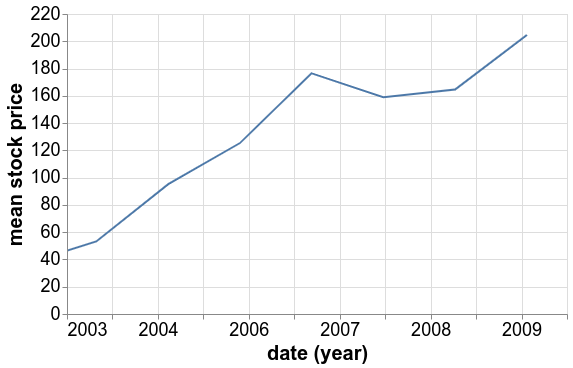

In [34]:
stocks = data.stocks()

alt.Chart(stocks).mark_line(clip=True).encode(
    x=alt.X('year(date):Q', 
            scale=alt.Scale(domain=(2004, 2010))
           ),
    y=Y('average(price)', title='mean stock price')
)

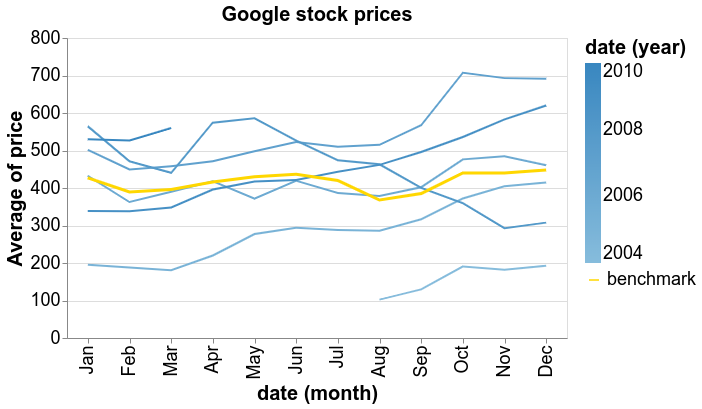

In [35]:
import numpy as np

stocks=data.stocks()
stocks['company'] = np.where(stocks['symbol']=='GOOG', 'benchmark', '')
google = stocks.query("symbol=='GOOG'")

all_lines = alt.Chart(google).mark_line().encode(
    x='month(date):N',
    y='average(price):Q',
    color='year(date)',
).properties(title='Google stock prices')

avg_line = alt.Chart(google).mark_line(color='red', strokeWidth=3).encode(
    x='month(date):N',
    y='average(price):Q',
    color=alt.Color('company:N', scale=alt.Scale(range=['gold']), legend=Legend(title=None))
)

all_lines + avg_line

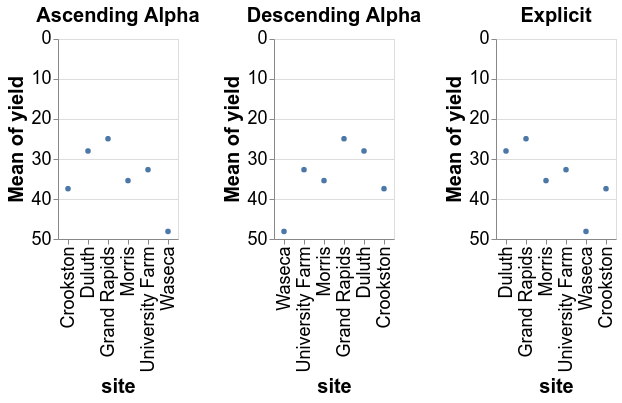

In [36]:
barley = data.barley()

base = alt.Chart(barley).mark_point(filled=True).encode(
y=alt.Y(field='yield', type='quantitative', aggregate='mean', sort='descending')
)

alt.hconcat(
    base.encode(x=alt.X(field='site', type='nominal', sort='ascending')).properties(title='Ascending Alpha'),
    base.encode(x=alt.X(field='site', type='nominal', sort='descending')).properties(title='Descending Alpha'),
    base.encode(x=alt.X(field='site', type='nominal', sort=['Duluth','Grand Rapids','Morris','University Farm','Waseca','Crookston'])
    ).properties(title='Explicit'),
)


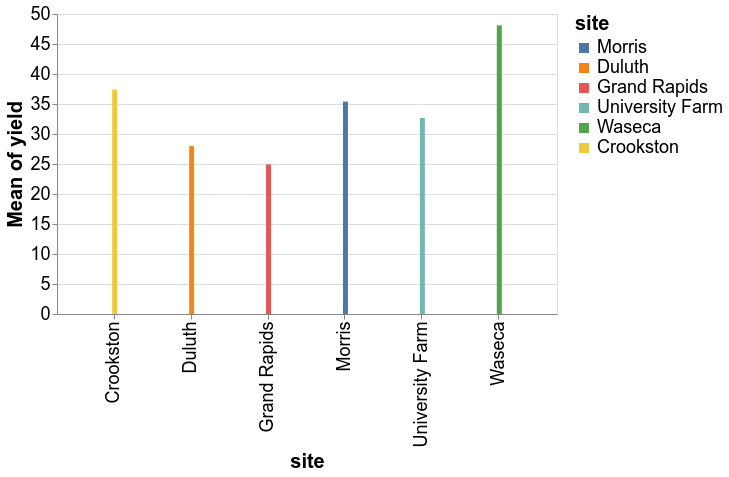

In [37]:
import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    y='mean(yield)',
    x=alt.X('site:N', sort='ascending'),
    color=alt.Color('site:N', sort=['Morris','Duluth','Grand Rapids','University Farm','Waseca', 'Crookston']
    )
)

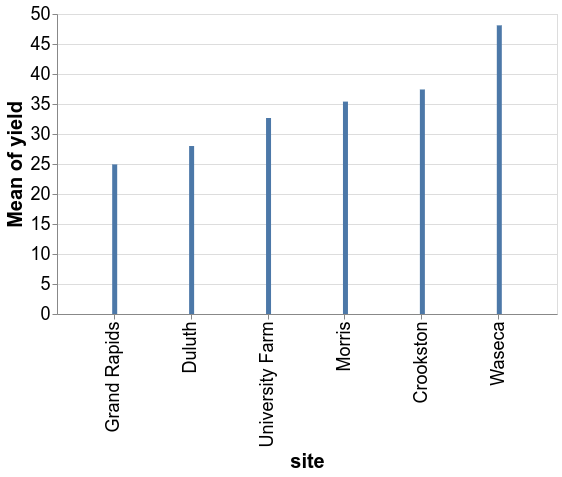

In [38]:
alt.Chart(data.barley()).mark_bar().encode(
  x=alt.X('site', sort=alt.EncodingSortField(op='mean', field='yield')),
  y='mean(yield)'
)

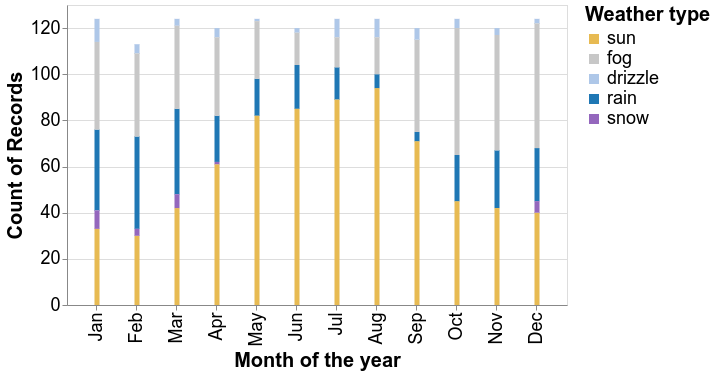

In [39]:
weather=data.seattle_weather()

scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])

alt.Chart(weather).mark_bar().encode(
    x=alt.X('month(date):N', axis=alt.Axis(title='Month of the year')),
    y='count()',
    color=alt.Color('weather', legend=alt.Legend(title='Weather type'), scale=scale),
)

### A nice way to encode a lot of info in a simple looking display

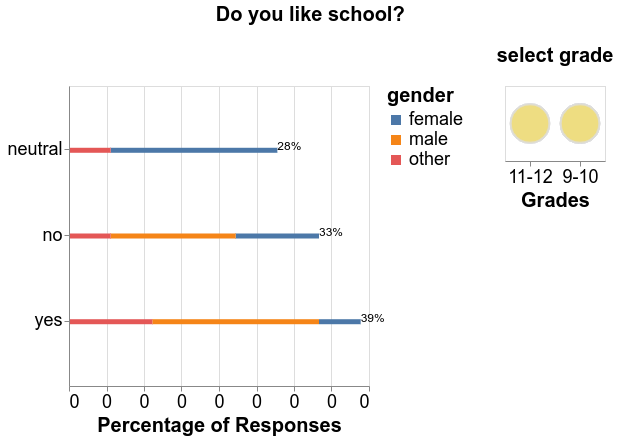

In [40]:
df=pd.DataFrame({'gender': ['male', 'male', 'male', 'female', 'female', 'other', 'other', 'female', 'female', 'female', 'male', 'male', 'female',  'other', 'other', 'female', 'male', 'male'], 
                 'grade': ['9-10', '11-12', '11-12', '9-10', '11-12', '9-10', '9-10', '9-10', '11-12', '11-12', '9-10', '11-12', '9-10', '9-10', '9-10', '9-10', '11-12', '11-12'], 
                 'like_school': ['yes', 'no', 'yes', 'neutral', 'neutral', 'no', 'yes', 'no', 'neutral', 'no', 'yes', 'no', 'yes', 'yes', 'neutral', 'neutral', 'no', 'yes']})

tmp1=df.groupby(['like_school','gender', 'grade']).size() / len(df.index)# * 100
tmp2=df.groupby(['like_school','gender', 'grade']).size()
tmp=pd.concat([tmp1,tmp2], axis=1)
tmp=tmp.reset_index().rename(columns={0: 'percentage', 1: 'number'})
#tmp['percentage']=tmp['percentage'].round().astype(int)

selection = alt.selection_multi(fields=['grade'])
my_condition = alt.condition(selection, alt.Color('grade:N', legend=None, scale=alt.Scale(range=['#EEDD82', '#EEDD82'])), alt.value('lightgray'))

click=alt.Chart().mark_circle(size=1500, stroke='great').encode(
    x=alt.X('grade:N', axis=alt.Axis(title='Grades', labelAngle=0)),
    color=my_condition,
    ).properties(width=100, height=75, selection=selection, title='select grade')

bars=alt.Chart().mark_bar().encode(
    y=alt.Y('like_school', title=None),
    x='sum(percentage)',
    color='gender',
    tooltip=[alt.Tooltip('sum(number)', title='number of records'), alt.Tooltip('sum(percentage)', title='percentage of records', format='.0%')]
).properties(
    width=300,
    height=300,
).transform_filter(selection)

text=alt.Chart().mark_text(dx=12, size=12).encode(
    text=alt.Text('sum(percentage)', format='.0%'),
    y='like_school',
    x=alt.X('sum(percentage)', title='Percentage of Responses')
).properties(
    width=300,
    height=300
).transform_filter(selection)

comp=alt.hconcat((bars + text), click, spacing=30, title='Do you like school?', data=tmp)
comp.resolve_scale('independent').configure_title(offset=20, anchor='middle', fontSize=20, limit=1000)